<span style="background-color: lightgreen"><font size =6>Project II: Stock Market -- Part II <font></span>


**In this excercise, we will examine our knowledge on stock market**

**Stock Market**

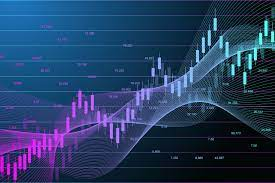

In [14]:
import os
from IPython.display import Image, display, Markdown
from IPython.display import HTML
 

DOCUMENTS_PATH = os.getcwd()

display(Markdown("**Stock Market**"))
display(Image(f"{DOCUMENTS_PATH}/nyse.png"))

## which libraries 

* libs

In [15]:
import os 
import re 
import requests 
import json
import numpy as np
import math 
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt
from PIL import Image as img
import time 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  

In [16]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/

* libs for time series

In [17]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from typing import Dict

# jupyter kernelspec uninstall unwanted-kernel
# !pip install yfinance 

# Get data. Examine data

## Download stock market data

## choose a sticker and date range

In [2]:
ticker = "msft"

In [21]:
def get_ticker_metadata(ticker: str) -> Dict[str, str]: 
    """
    :param ticker: stock ticker
    :return: Dictionary containing some metadata
    """
    result = {"company_name": "not_found",
              "market_cap": "not_found"} 
    try:
        info = yf.Ticker(ticker).info
        if info:
            if 'longName' in info:
                result["company_name"] = info['longName']
            if "marketCap" in info:
                result["market_cap"] = str(round((info['marketCap']/1000000000), 2)) + " blns$"
    except Exception as e:
        print(e)
    return result

In [22]:
rs = get_ticker_metadata(ticker)
display(Markdown(f"<font size = 6, color = blue>{ticker}  </font>"))
display(Markdown(f"<font size = 5, color = blue>{rs['company_name']}  </font>"))
display(Markdown(f"<font size = 5, color = blue>{rs['market_cap']}  </font>"))

<font size = 6, color = blue>msft  </font>

<font size = 5, color = blue>Microsoft Corporation  </font>

<font size = 5, color = blue>2095.44 blns$  </font>

In [23]:
company_name, market_cap = rs['company_name'], rs['market_cap']

In [24]:
start_date, end_date = datetime(2007,1,1), datetime(2022,7,27)

## load data

In [25]:
def get_data(ticker, start_date, end_date):  
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2023, 1, 1)

    # get the data
    data = yf.download(ticker, start = start_date,
                       end = end_date)

    # display
    plt.figure(figsize = (20,10))
    plt.title('Opening Prices from {} to {}'.format(start_date,
                                                    end_date))
    plt.plot(data['Open'])
    plt.show()
    
    return data 

[*********************100%***********************]  1 of 1 completed


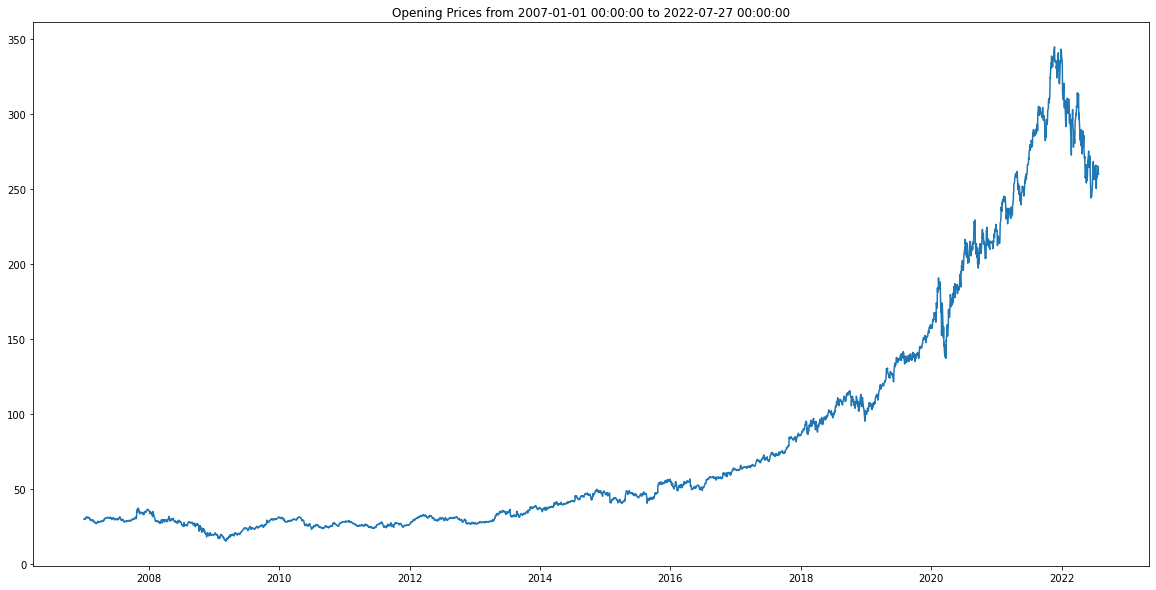

In [26]:
 
DATA = get_data(ticker, start_date, end_date)

* all columns:

## draw more columns

In [38]:
list(DATA)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [28]:
def draw_data(price_type): 
    data = DATA.copy()
    #plot close price
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(data[price_type])
    plt.title(f'{company_name} {price_type} Price')
    plt.show()
    

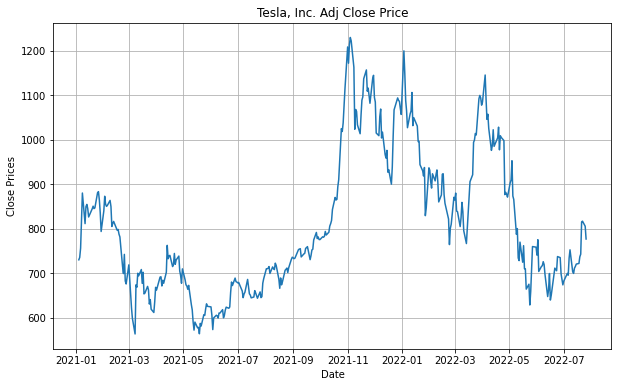

In [29]:
 draw_data("Adj Close")

# Continue - 7/30

## Draw multiple lines

In [113]:
def draw_data(price_type1, price_type2):  
    data = DATA.copy()
    columns = list(data)
    
    if price_type1 not in columns:
        print(f"{price_type1} is not a price type")
        return
    
    if price_type2 not in columns:
        print(f"{price_type2} is not a price type")
        return
     
    #plot close price
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(data[price_type1])
    plt.plot(data[price_type2])
    
    plt.legend([price_type1,price_type2])
    
    plt.title(f'{company_name} -- {price_type1} and {price_type2} Price')
    plt.show()

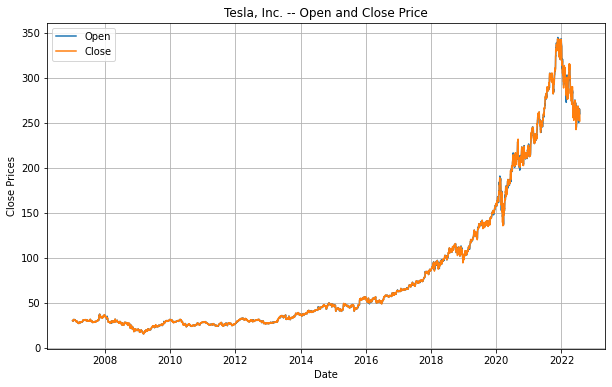

In [114]:
# try it: 
draw_data("Open", "Close")

## Manipulate data

In [44]:
def manipulate_data():
    data = DATA.copy()
    data["Gap"] = data["High"] - data["Low"]
    data["Gap_to_Open%"] = 100.*data["Gap"]/data["Open"]
    
    return data

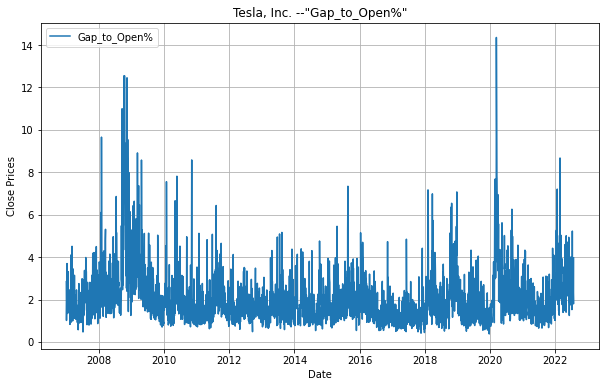

In [115]:
def draw_gap():   
    data = manipulate_data()  
    #plot close price
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(data["Gap_to_Open%"]) 
    
    plt.legend(["Gap_to_Open%"])
    
    plt.title(f'{company_name} --"Gap_to_Open%"')
    plt.show()

draw_gap()

# Stock Market: Part II

<font color=red  size=4>https://www.machinelearningplus.com/time-series/time-series-analysis-python/ </font>

## time series

* Time series is a sequence of observations recorded at regular time intervals. <BR>
`per second, per minute, hourly, daily....`

'Microsoft Corporation'

In [131]:
price_type = "Close"

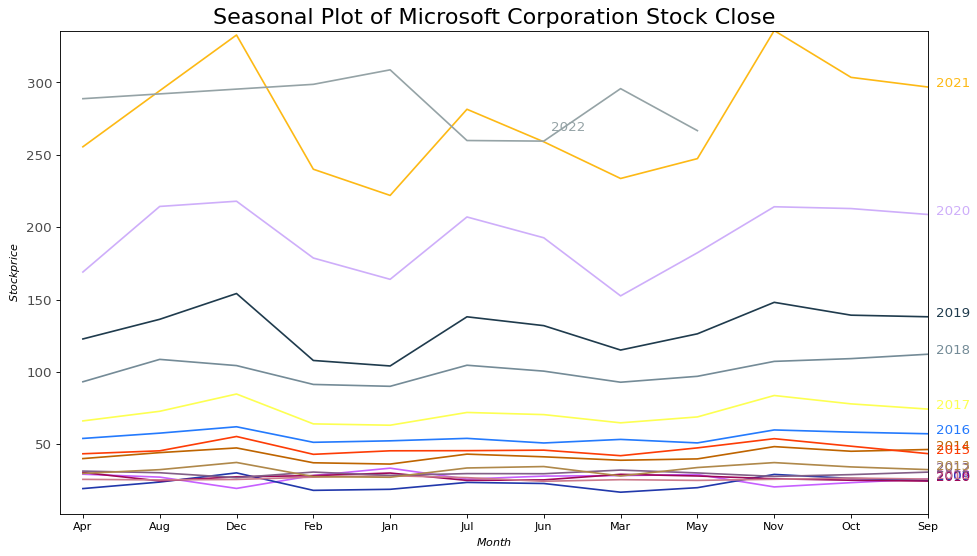

In [134]:
dat = DATA.copy() 
dat.reset_index(inplace = True)

dat["year"] = [d.year for d in dat.Date]
dat["month"] = [d.strftime('%b') for d in dat.Date]
years = dat['year'].unique() 
dat = dat.groupby(["year", "month"])[price_type].mean().reset_index()

max_close = dat[price_type].max()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
plt.figure(figsize=(14,8), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Close', data=dat.loc[dat.year==y, :], color=mycolors[i], label=y)
        plt.text(dat.loc[dat.year==y, :].shape[0]-.9, dat.loc[dat.year==y, price_type][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, max_close), ylabel='$Stock price$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title(f"Seasonal Plot of {company_name} Stock {price_type}", fontsize=20)
plt.show()

## boxplot

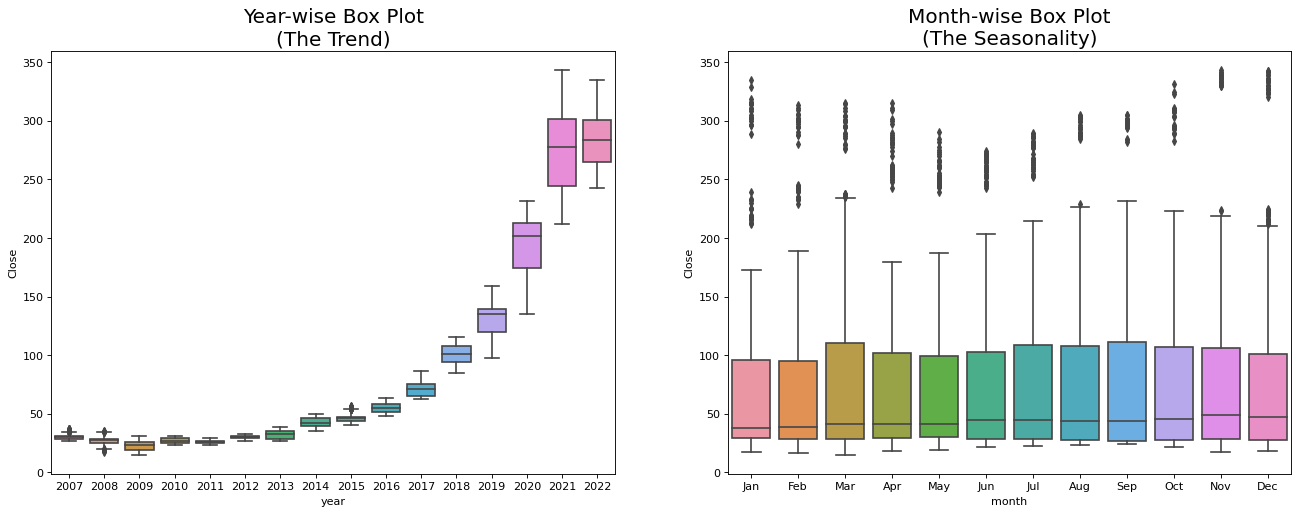

In [140]:
dat = DATA.copy() 
dat.reset_index(inplace = True)
price_type = "Close"

dat["year"] = [d.year for d in dat.Date]
dat["month"] = [d.strftime('%b') for d in dat.Date]
years = dat['year'].unique() 

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=price_type, data=dat, ax=axes[0])
sns.boxplot(x='month', y=price_type, data=dat.loc[:, :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [141]:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## Time 
* Patterns in a time series
* Any time series may be split into the following components: Base Level + Trend + Seasonality + Error
* not always have to be "time". cyclic is enough. 
* A cyclic pattern exists when data exhibit rises and falls that are not of fixed period.

### types of time series
* Additive time series:
<br>Value = Base Level + Trend + Seasonality + Error

* Multiplicative Time Series:
<br>Value = Base Level x Trend x Seasonality x Error

### decompose
* 5, 20, 253: trading

In [172]:
# Multiplicative Decomposition 
dat = DATA.copy()
dat.reset_index(inplace = True)
dat.sort_index(inplace = True)

dat["Date"] = pd.to_datetime(dat["Date"])
dat.set_index("Date", inplace = True)
price_type = "Close"
dat= dat[[price_type]]  

#5, 20, 253

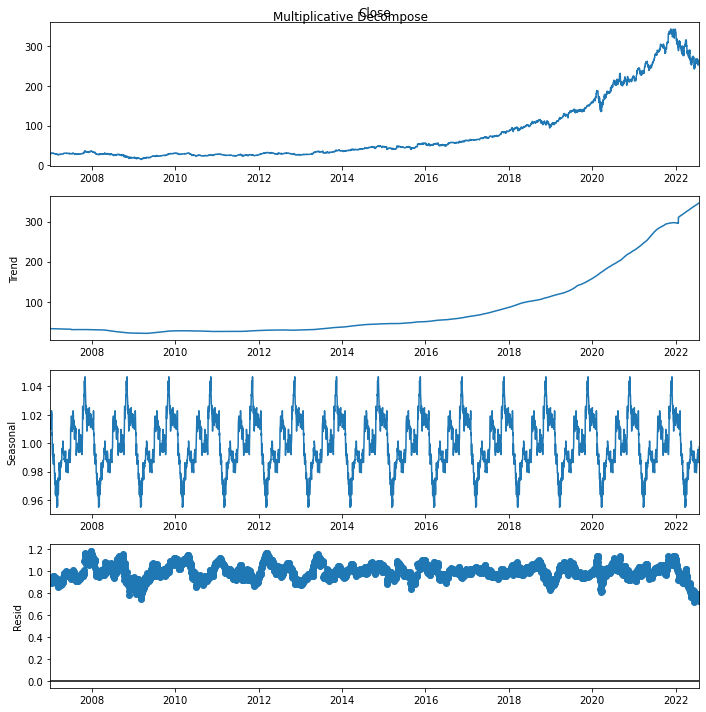

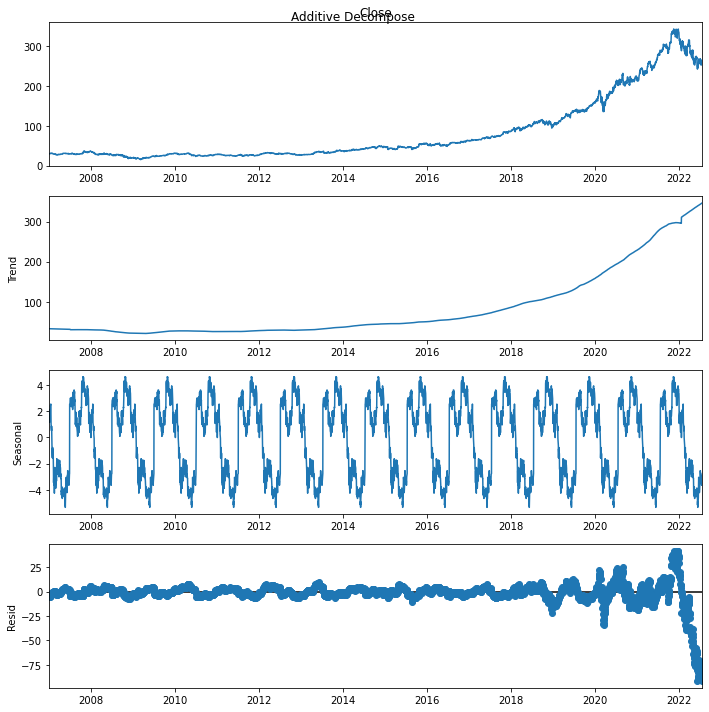

In [176]:
#multiplicative 
result_mul = seasonal_decompose(dat[price_type], model='multiplicative', period = 253,  extrapolate_trend='freq')
# seasonal_decompose(data["Open"], period = 7, model='multiplicative' )
 
# Additive Decomposition
result_add = seasonal_decompose(dat[price_type], model='additive',period = 253, extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

### Why make a non-stationary series stationary before forecasting?
* Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

### stationary test
* There are multiple implementations of Unit Root tests like:

* Augmented Dickey Fuller test (ADH Test)
* Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
* Philips Perron test (PP Test)

In [177]:
from statsmodels.tsa.stattools import adfuller, kpss

In [178]:
# ADF Test
dat = DATA.copy()
price_type = 'Close'

result = adfuller(dat[price_type], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(dat[price_type], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.224537211108429
p-value: 0.9961511040797363
Critial Values:
   1%, -3.4320317320238214
Critial Values:
   5%, -2.862283097095044
Critial Values:
   10%, -2.5671655594763263

KPSS Statistic: 7.048360
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


### detrend

Text(0.5, 1.0, 'Stock price detrended by subtracting the least squares fit')

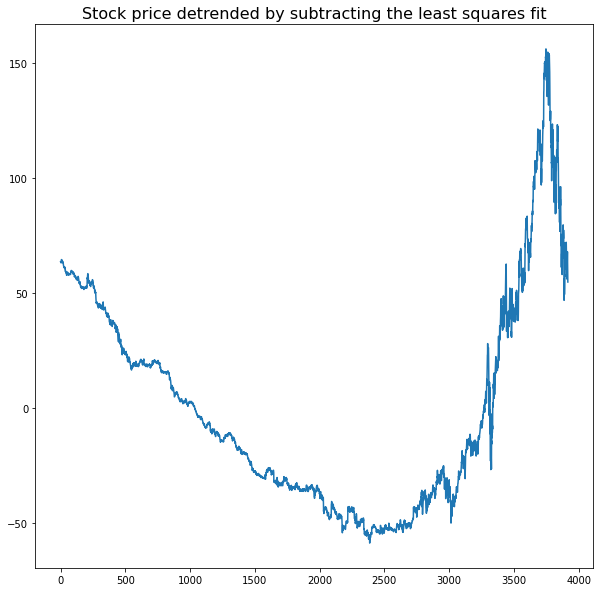

In [180]:
# Using scipy: Subtract the line of best fit
from scipy import signal 
dat = DATA.copy()
price_type = 'Close'


detrended = signal.detrend(dat[price_type])
plt.plot(detrended)
plt.title('Stock price detrended by subtracting the least squares fit', fontsize=16)


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

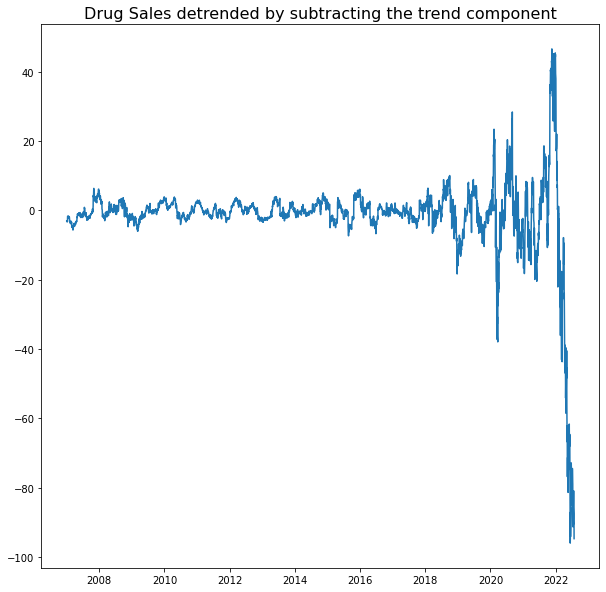

In [185]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose 


dat = DATA.copy()
price_type = 'Close'

result_mul = seasonal_decompose(dat[price_type], model='multiplicative',period = 253,  extrapolate_trend='freq')
detrended = dat[price_type] - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

### deseason
* How to deseasonalize a time series?

[]

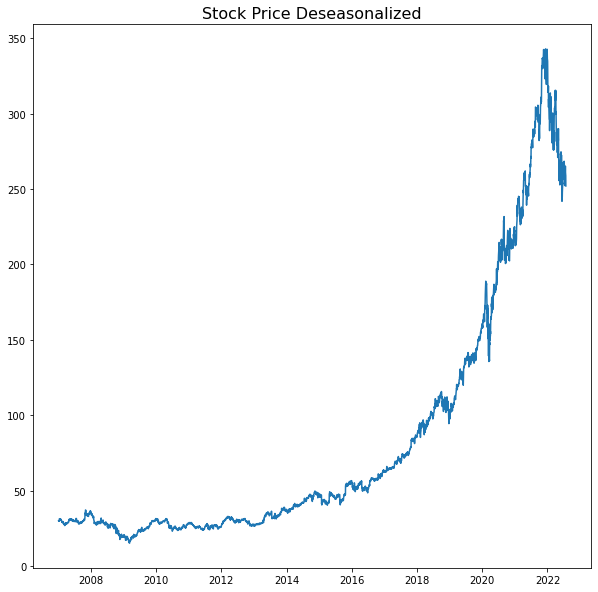

In [188]:

dat = DATA.copy()
price_type = 'Close'

# Time Series Decomposition
result_mul = seasonal_decompose(dat[price_type], model='multiplicative', period = 20, extrapolate_trend='freq')

# Deseasonalize
deseasonalized = dat[price_type] / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Stock Price Deseasonalized', fontsize=16)
plt.plot()

# forecast

<Figure size 720x720 with 0 Axes>

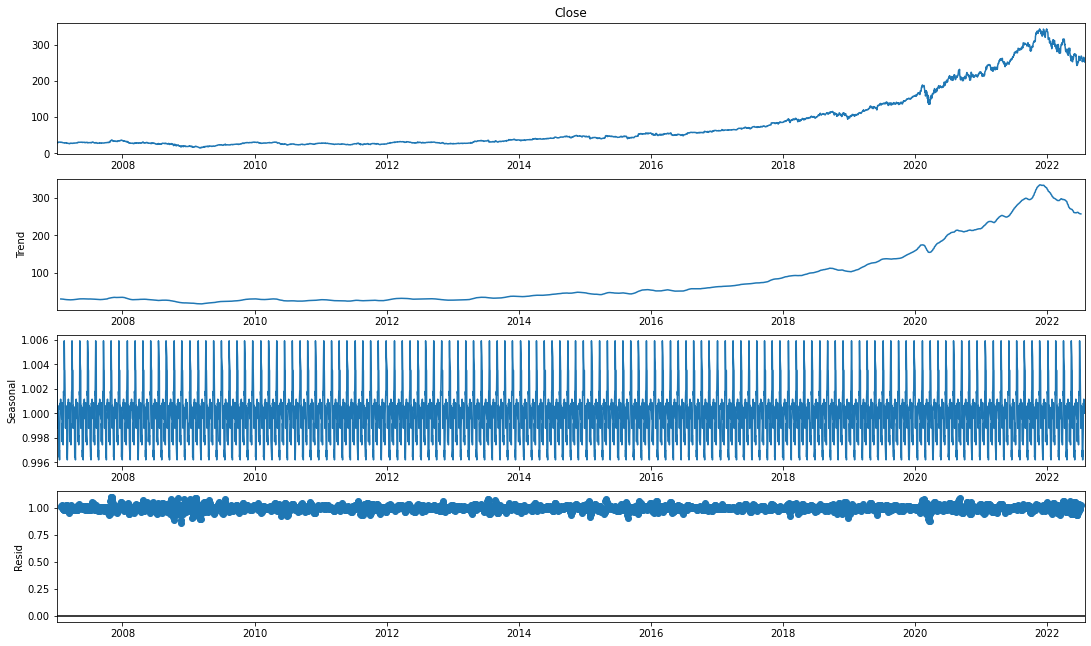

In [191]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
dat = DATA.copy()
price_type = 'Close'

result = seasonal_decompose(dat[price_type], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


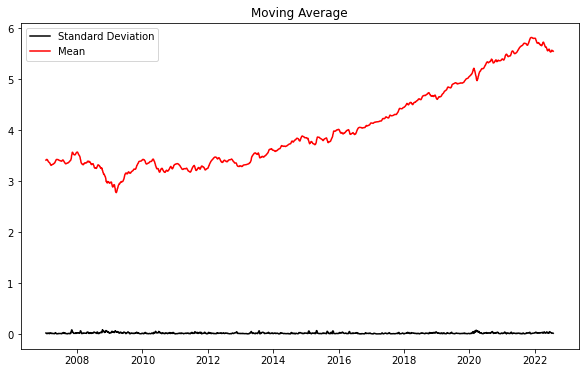

In [192]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(dat[price_type])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

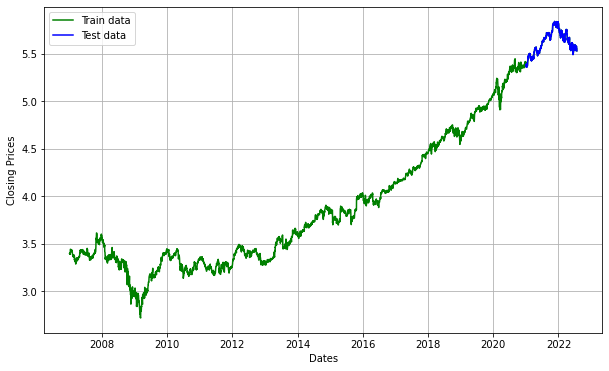

In [193]:
#split data into train and training set 

train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18324.555, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18381.140, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18383.939, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18323.082, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18382.385, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18382.495, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18381.737, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-18381.224, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.181 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3523
Model:               SARIMAX(0, 1, 1)   Log Likelihood                9194.969
Date:                Fri, 29 Jul 2022   AIC                         -18383.939
Time:               

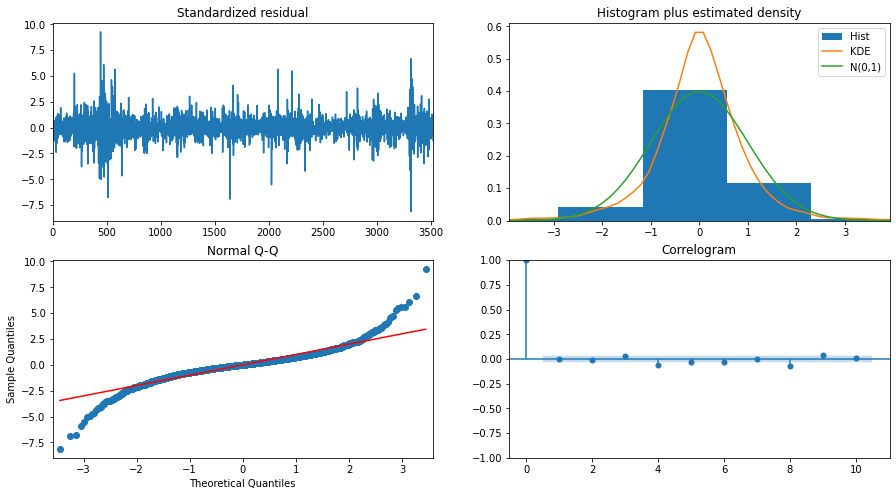

In [194]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [204]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,2))  
model_fit = model.fit()  
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3523
Model:                 ARIMA(1, 1, 2)   Log Likelihood                9193.448
Date:                Fri, 29 Jul 2022   AIC                         -18378.897
Time:                        22:45:13   BIC                         -18354.230
Sample:                             0   HQIC                        -18370.096
                               - 3523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3217      0.671     -0.479      0.632      -1.637       0.994
ma.L1          0.1907      0.674      0.283      0.777      -1.129       1.511
ma.L2         -0.0566      0.086     -0.659      0.5

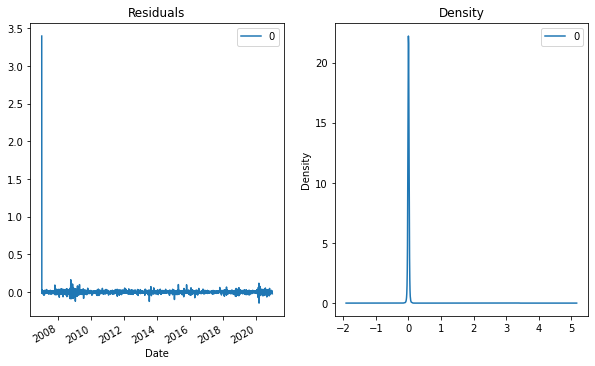

In [205]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [202]:
# Forecast #fc, se, conf = 
fitted.forecast(12, alpha=0.05)  # 95% conf

3523    5.385803
3524    5.386137
3525    5.386030
3526    5.386064
3527    5.386053
3528    5.386057
3529    5.386056
3530    5.386056
3531    5.386056
3532    5.386056
3533    5.386056
3534    5.386056
Name: predicted_mean, dtype: float64

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# forcast

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,29.910000,30.250000,29.400000,29.860001,21.734058,76935100
2007-01-04,29.700001,29.969999,29.440001,29.809999,21.697674,45774500
2007-01-05,29.629999,29.750000,29.450001,29.639999,21.573933,44607200
2007-01-08,29.650000,30.100000,29.530001,29.930000,21.785007,50220200
2007-01-09,30.000000,30.180000,29.730000,29.959999,21.806847,44636600
...,...,...,...,...,...,...
2022-07-20,259.899994,264.869995,258.910004,262.269989,262.269989,22788300
2022-07-21,259.790009,264.890015,257.029999,264.839996,264.839996,22404700
2022-07-22,265.239990,265.329987,259.070007,260.359985,260.359985,21871000


## Parameters
### https://alkaline-ml.com/pmdarima/index.html
start_p : int, optional (default=2)

The starting value of p, the order (or number of time lags) of the auto-regressive (“AR”) model. Must be a positive integer.

d : int, optional (default=None)

The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the test (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or the Phillips–Perron test will be conducted to find the most probable value). Must be a positive integer or None. Note that if d is None, the runtime could be significantly longer.

start_q : int, optional (default=2)

The starting value of q, the order of the moving-average (“MA”) model. Must be a positive integer.

max_p : int, optional (default=5)

The maximum value of p, inclusive. Must be a positive integer greater than or equal to start_p.

max_d : int, optional (default=2)

The maximum value of d, or the maximum number of non-seasonal differences. Must be a positive integer greater than or equal to d.

max_q : int, optional (default=5)

The maximum value of q, inclusive. Must be a positive integer greater than start_q.

start_P : int, optional (default=1)

The starting value of P, the order of the auto-regressive portion of the seasonal model.

D : int, optional (default=None)

The order of the seasonal differencing. If None (by default, the value will automatically be selected based on the results of the seasonal_test. Must be a positive integer or None.

start_Q : int, optional (default=1)

The starting value of Q, the order of the moving-average portion of the seasonal model.

max_P : int, optional (default=2)

The maximum value of P, inclusive. Must be a positive integer greater than start_P.

max_D : int, optional (default=1)

The maximum value of D. Must be a positive integer greater than D.

max_Q : int, optional (default=2)

The maximum value of Q, inclusive. Must be a positive integer greater than start_Q.

max_order : int, optional (default=5)

Maximum value of p+q+P+Q if model selection is not stepwise. If the sum of p and q is >= max_order, a model will not be fit with those parameters, but will progress to the next combination. Default is 5. If max_order is None, it means there are no constraints on maximum order.

m : int, optional (default=1)

The period for seasonal differencing, m refers to the number of periods in each season. For example, m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. Note that if m == 1 (i.e., is non-seasonal), seasonal will be set to False. For more information on setting this parameter, see Setting m.
7 - daily
12 - monthly
52 - weekly
seasonal : bool, optional (default=True)

Whether to fit a seasonal ARIMA. Default is True. Note that if seasonal is True and m == 1, seasonal will be set to False.

stationary : bool, optional (default=False)

Whether the time-series is stationary and d should be set to zero.

information_criterion : str, optional (default=’aic’)

The information criterion used to select the best ARIMA model. One of pmdarima.arima.auto_arima.VALID_CRITERIA, (‘aic’, ‘bic’, ‘hqic’, ‘oob’).



In [31]:
# !pip3 install pyramid-arima
import pmdarima as pm
dat = DATA.copy()
price_type = 'Close'
dat = dat[[price_type]]

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(dat[price_type], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=25068.285, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=18185.030, Time=3.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=22019.788, Time=3.94 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=25119.112, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=19175.112, Time=0.55 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=17756.568, Time=18.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=58.79 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=19.11 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=25020.561, Time=12.61 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=17698.092, Time=23.13 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=18127.797, Time=4.81 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=58.13 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=21.64 sec
 ARIMA(3,0,0)(2,1,0)[12] in

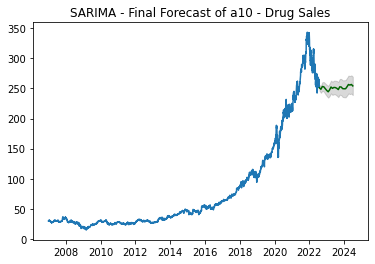

In [33]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dat.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dat)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

* In mathematics and statistics, a stationary process (or a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time.[1] Consequently, parameters such as mean and variance also do not change over time.  
* example:

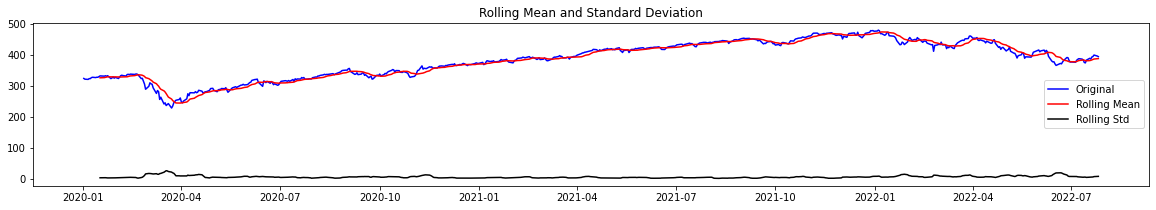

Results of dickey fuller test
Test Statistics                 -1.317079
p-value                          0.621323
No. of lags used                 0.000000
Number of observations used    645.000000
critical value (1%)             -3.440529
critical value (5%)             -2.866031
critical value (10%)            -2.569162
dtype: float64


In [10]:
#Test for staionarity
plt.rcParams["figure.figsize"] = (20,3)
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics: 
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data["Open"])

In [11]:
timeseries =[9,2,34,7,5,6,7,8,9]
adfuller(timeseries,autolag='AIC')

(-11.410361645628031,
 7.275762826556185e-21,
 2,
 6,
 {'1%': -5.354256481481482,
  '5%': -3.6462381481481483,
  '10%': -2.901197777777778},
 19.849808018718942)

<Figure size 1440x216 with 0 Axes>

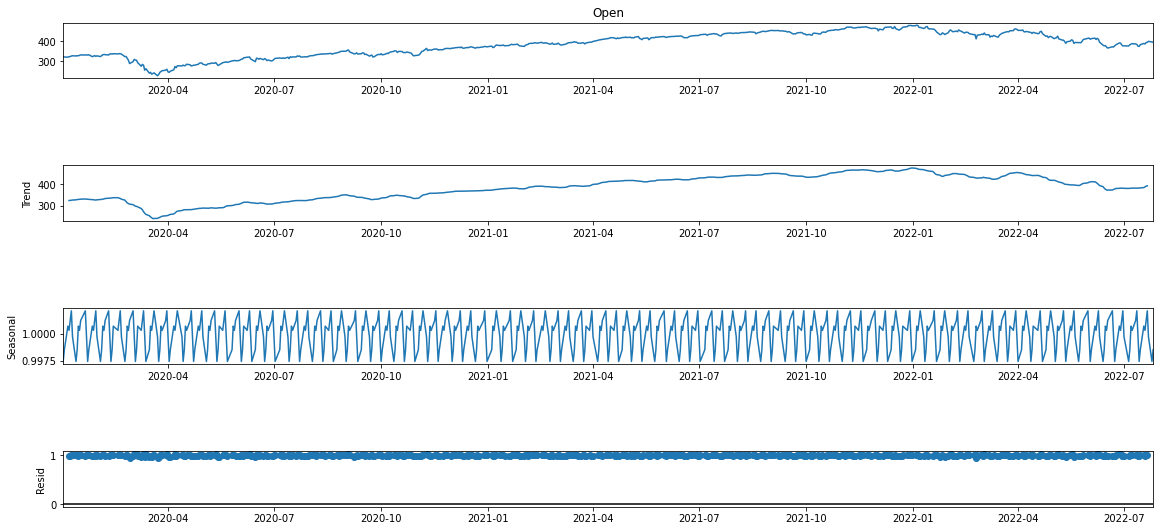

In [20]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data["Open"], period = 7, model='multiplicative' )
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


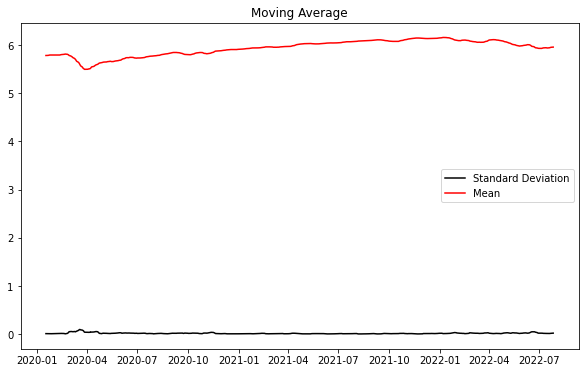

In [24]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data["Open"])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

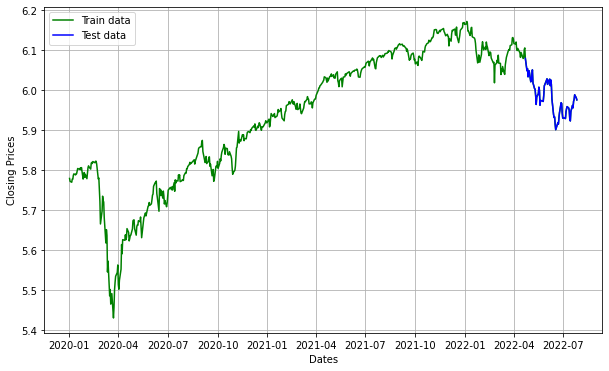

In [13]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3255.744, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3259.531, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3259.009, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3256.838, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3258.638, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3258.134, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3256.794, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3260.428, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-3259.620, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3259.058, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3259.909, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3257.846, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.272 seconds
                               SARIMAX Results                              

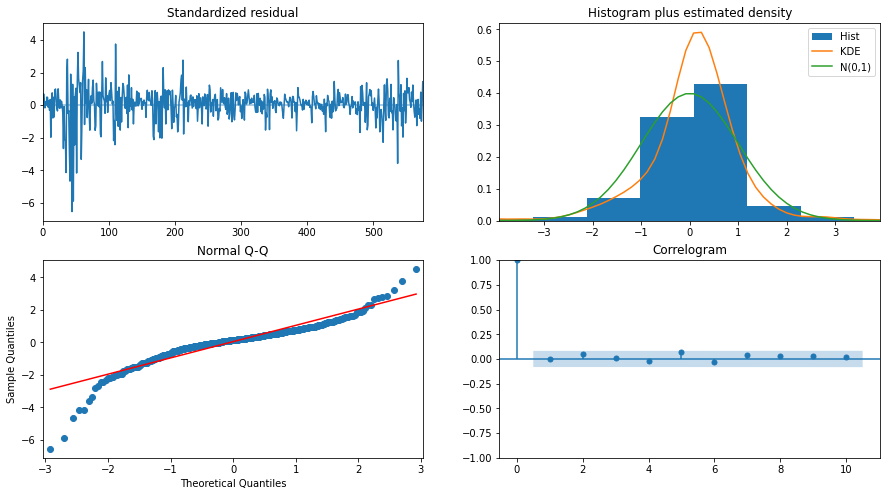

In [14]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [15]:
#Modeling
# Build Model
model = ARIMA(train_data, order = (1,1,2))
fitted = model.fit()  
print(fitted.summary())

# Forecast
# fc, se, conf = fitted.forecast(321, alpha=0.05)  # 95% conf
aaaa = fitted.forecast(12, alpha=0.05)  # 95% conf

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  578
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1632.164
Date:                Tue, 26 Jul 2022   AIC                          -3256.328
Time:                        19:08:41   BIC                          -3238.896
Sample:                             0   HQIC                         -3249.530
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5170      0.337     -1.533      0.125      -1.178       0.144
ma.L1          0.4246      0.332      1.279      0.201      -0.226       1.075
ma.L2          0.0069      0.041      0.169      0.8

In [18]:
fitted.forecast(3)

578    6.106390
579    6.106222
580    6.106309
Name: predicted_mean, dtype: float64

# Py Learning from Above

## List: advanced 
## Exception (optional)
## access a list
## Challenge: Can you wrap it to a function?

# Colab Review